Alejandro Jesús Manotas Marmolejo

Código: 200108289

In [1]:
#Montar el drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# import other dependencies
#import six
from sklearn import tree #For our Decision Tree
from sklearn import metrics #For our Decision Tree
from sklearn.model_selection import train_test_split

import pydotplus # To create our Decision Tree Graph
from sklearn.tree import export_text # To visualize the Tree in a text organized way
from IPython.display import Image  # To Display an image of our graph
import graphviz #To display an imahe of the tree

In [4]:
# Read dataset
car = pd.read_excel('/content/drive/MyDrive/Car_dataset.xlsx')

car.head(5)

,Color,Type,Doors,Tires,Class
0,Red,SUV,2,Whitewall,+
1,Blue,Minivan,4,Whitewall,-
2,Green,Car,4,Whitewall,-
3,Red,Minivan,4,Blackwall,-
4,Green,Car,2,Blackwall,+


In [10]:
# Convert categorical variable into dummy/indicator variables or (binary vairbles) essentialy 1's and 0's
car['Color'],_ = pd.factorize(car['Color'])
car['Type'],_ = pd.factorize(car['Type'])
car['Doors'],_ = pd.factorize(car['Doors'])
car['Tires'],_ = pd.factorize(car['Tires'])
car['Class'],_ = pd.factorize(car['Class'])

#print the new dummy data
cat_data = car.loc[:,('Color','Type','Doors','Tires')]
cat_data

,Color,Type,Doors,Tires
0,0,0,0,0
1,1,1,1,0
2,2,2,1,0
3,0,1,1,1
4,2,2,0,1
5,2,0,1,1
6,1,0,0,1
7,1,2,0,0
8,0,0,0,1
9,1,2,1,1


In [20]:
# The decision tree classifier.
clf = tree.DecisionTreeClassifier(criterion='entropy')

# Training the Decision Tree - Can split the data here for training
x_train, x_test, y_train, y_test = train_test_split(cat_data, car['Class'], test_size=0.1, random_state=4)

#config = {'algorithm': 'ID3'}
clf_train = clf.fit(x_train, y_train)

#Predict testing set
y_pred = clf.predict(x_test)
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))

# Export/Print a decision tree in DOT format.
print(tree.export_graphviz(clf_train, None))

Accuracy: 0.5
digraph Tree {
node [shape=box] ;
0 [label="X[0] <= 0.5\nentropy = 0.918\nsamples = 12\nvalue = [4, 8]"] ;
1 [label="X[3] <= 0.5\nentropy = 0.918\nsamples = 3\nvalue = [2, 1]"] ;
0 -> 1 [labeldistance=2.5, labelangle=45, headlabel="True"] ;
2 [label="entropy = 0.0\nsamples = 1\nvalue = [1, 0]"] ;
1 -> 2 ;
3 [label="X[1] <= 1.0\nentropy = 1.0\nsamples = 2\nvalue = [1, 1]"] ;
1 -> 3 ;
4 [label="entropy = 0.0\nsamples = 1\nvalue = [0, 1]"] ;
3 -> 4 ;
5 [label="entropy = 0.0\nsamples = 1\nvalue = [1, 0]"] ;
3 -> 5 ;
6 [label="X[3] <= 0.5\nentropy = 0.764\nsamples = 9\nvalue = [2, 7]"] ;
0 -> 6 [labeldistance=2.5, labelangle=-45, headlabel="False"] ;
7 [label="X[1] <= 0.5\nentropy = 0.971\nsamples = 5\nvalue = [2, 3]"] ;
6 -> 7 ;
8 [label="entropy = 0.0\nsamples = 1\nvalue = [1, 0]"] ;
7 -> 8 ;
9 [label="X[2] <= 0.5\nentropy = 0.811\nsamples = 4\nvalue = [1, 3]"] ;
7 -> 9 ;
10 [label="entropy = 0.0\nsamples = 1\nvalue = [1, 0]"] ;
9 -> 10 ;
11 [label="entropy = 0.0\nsamples = 

In [17]:
# Another tree visualization
r = export_text(clf_train, feature_names=list(cat_data.columns.values))
print(r)

|--- Doors <= 0.50
|   |--- Type <= 1.00
|   |   |--- Tires <= 0.50
|   |   |   |--- class: 0
|   |   |--- Tires >  0.50
|   |   |   |--- class: 1
|   |--- Type >  1.00
|   |   |--- class: 0
|--- Doors >  0.50
|   |--- Type <= 0.50
|   |   |--- class: 0
|   |--- Type >  0.50
|   |   |--- class: 1



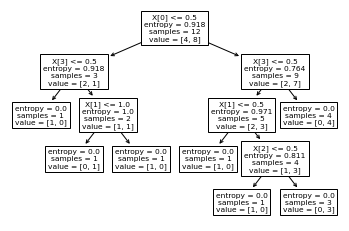

In [23]:
# Another tree visualization
tree.plot_tree(clf) 
plt.show()

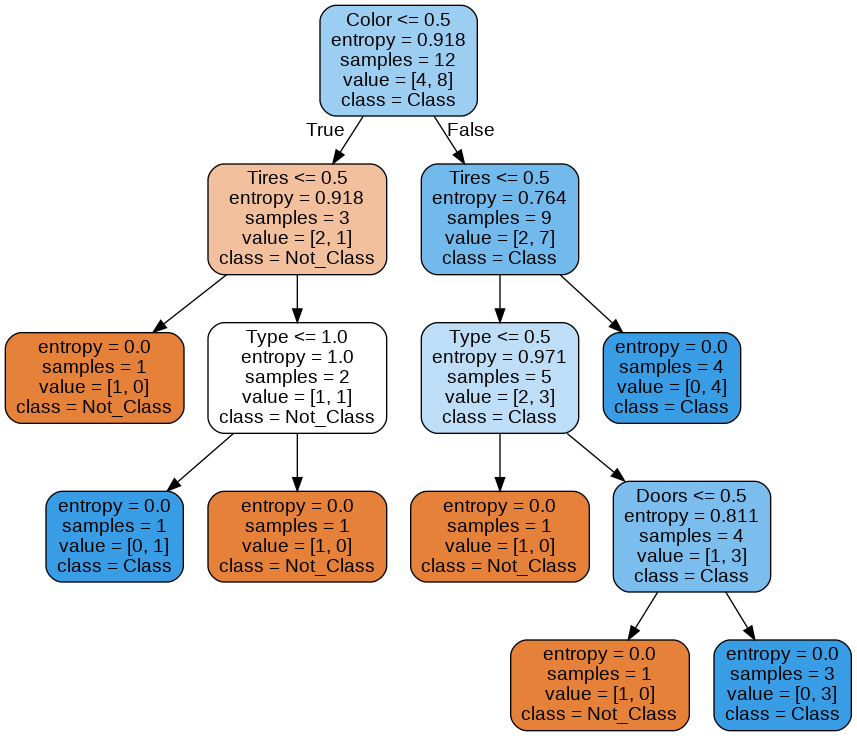

In [21]:
# Another tree visualization
#Create Dot Data
dot_data = tree.export_graphviz(clf_train, out_file=None, feature_names=list(cat_data.columns.values), 
                                class_names=['Not_Class', 'Class'], rounded=True, filled=True)

#Create Graph from DOT data
graph = pydotplus.graph_from_dot_data(dot_data)

# Show graph
Image(graph.create_png())

In [22]:
sample_one_pred = clf.predict([[2, 0, 0, 1]])
print(sample_one_pred)

[1]
